## Part 0: Data Wrangling

In [2]:
# import packages
import pandas as pd
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [222]:
# load json data as pandas dataframe
logins_df = pd.read_json('logins.json', convert_dates=True)

In [223]:
# insepct dataframe
logins_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.4 MB


In [224]:
logins_df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [225]:
# count of each login_time & set index
logins_df.sort_values('login_time', inplace=True)
logins_df['login_count']= 1
logins_df = logins_df.set_index('login_time')

In [226]:
logins_df.head()

,login_count
login_time,
1970-01-01 20:12:16,1
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:36,1
1970-01-01 20:16:37,1


In [227]:
# aggregate by 15 min intervals
login15 = logins_df.resample('15T').sum()
login15.head()

,login_count
login_time,
1970-01-01 20:00:00,2.0
1970-01-01 20:15:00,6.0
1970-01-01 20:30:00,9.0
1970-01-01 20:45:00,7.0
1970-01-01 21:00:00,1.0


<hr>

## Part 1: Exploratory Data Analysis

- Part 1A - Monthly Login Analysis
- Part 1B - Daily Login Analysis
- Part 1C - Hourly Login Analysis

In [228]:
# separate data by month
logins_jan = login15['1970-01']
logins_feb = login15['1970-02']
logins_mar = login15['1970-03']
logins_apr = login15['1970-04']

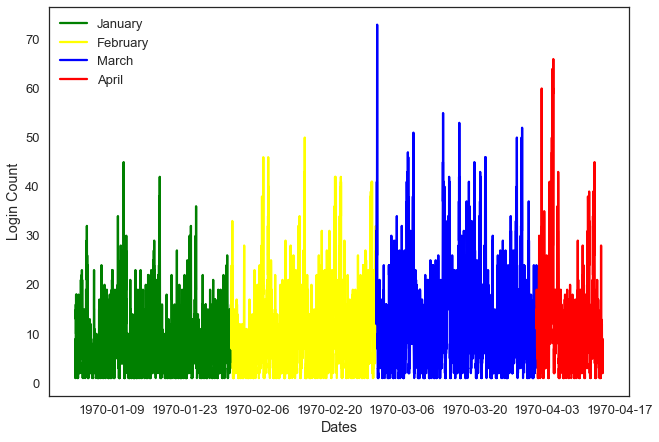

In [229]:
'''
ts = login15.plot(legend=False)
ts.set_ylabel('Count')
ts.set_xlabel('Login Date')
plt.show(ts)
'''

fig, ax = plt.subplots()

ax.plot(logins_jan, color='green', label='January')
ax.plot(logins_feb, color='yellow', label='February')
ax.plot(logins_mar, color='blue', label='March')
ax.plot(logins_apr, color='red', label='April')

plt.xlabel('Dates')
plt.ylabel('Login Count')
plt.legend(loc='upper left')
plt.show()

- January and February have a steady high/low trend
- March and April have more irregular peaks

## Part 1A - Monthly Login Analysis

In [230]:
# aggregate by month intervals
login_monthly = logins_df.resample('M').sum()

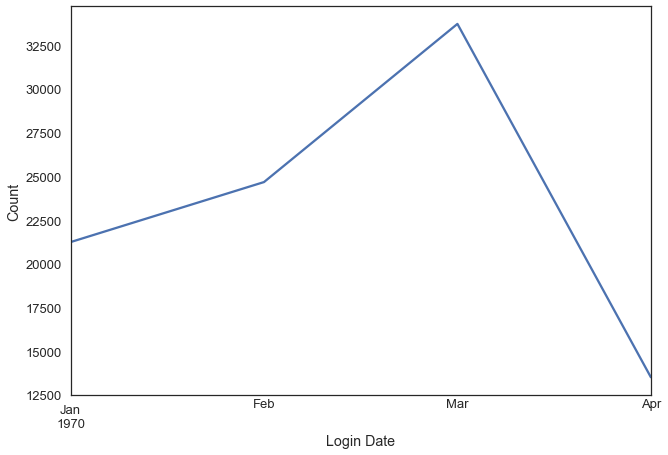

In [231]:
ts = login_monthly.plot(legend=False)
ts.set_ylabel('Count')
ts.set_xlabel('Login Date')
plt.show(ts)

- March has the maximum amount of logins - Analyze March more!
- There is a relatively steady incline into March
- There is a steep drop into April - Analyze April more!

### March Login Analysis

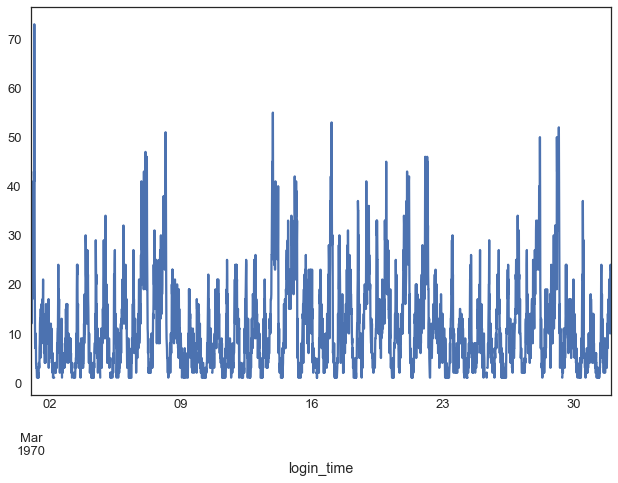

In [232]:
logins_mar.plot(legend=False)
plt.show()

- The peak in March seems to be caused by a peak in login count on March 1, at more than 70+

### April Login Analysis

In [233]:
logins_apr.tail()

,login_count
login_time,
1970-04-13 17:45:00,5.0
1970-04-13 18:00:00,5.0
1970-04-13 18:15:00,2.0
1970-04-13 18:30:00,7.0
1970-04-13 18:45:00,6.0


- The steep decline in April can be attributed to the amount of data collected
- Only 13 days have been collected in April, therefore, the total login count in April is much lower

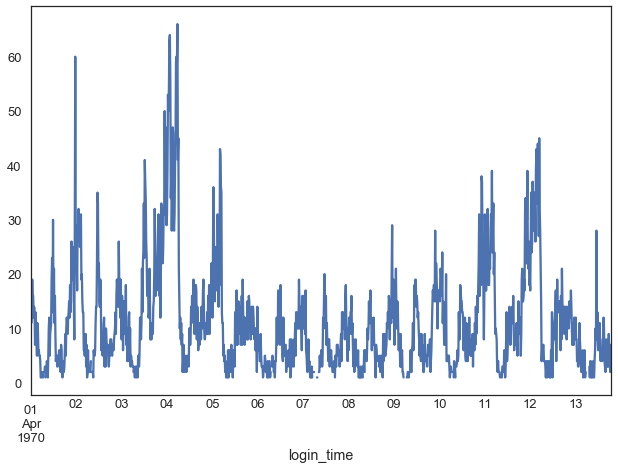

In [234]:
logins_apr.plot(legend=False)
plt.show()

## Part 1B - Daily Login Analysis

In [245]:
# separate by month, day, hour
login15['month'] = login15.index.month
login15['day'] = login15.index.weekday_name
login15['hour'] = login15.index.hour
login15.head()

,login_count,month,day,hour
login_time,,,,
1970-01-01 20:00:00,2.0,1,Thursday,20
1970-01-01 20:15:00,6.0,1,Thursday,20
1970-01-01 20:30:00,9.0,1,Thursday,20
1970-01-01 20:45:00,7.0,1,Thursday,20
1970-01-01 21:00:00,1.0,1,Thursday,21


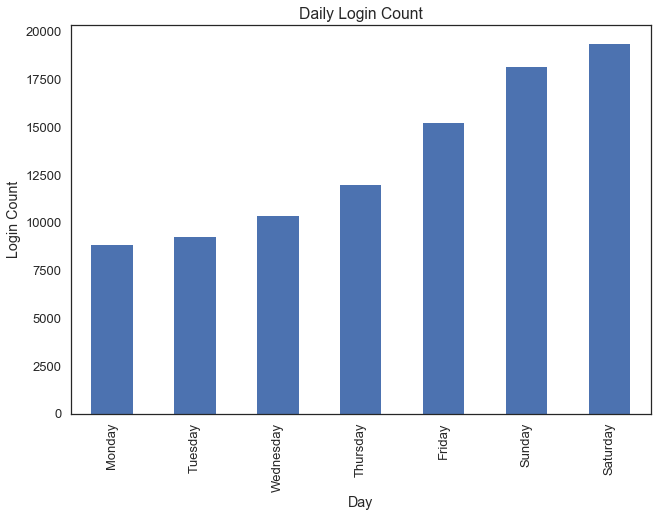

In [241]:
weekday_count = login15.groupby('day')['login_count'].sum()
weekday_count.sort_values().plot(kind='bar')

plt.xlabel('Day')
plt.ylabel('Login Count')
plt.title('Daily Login Count')
plt.show()

- Login counts on the weekend (Friday, Saturday, Sunday) are higher than on weekdays
- Highest login count is on Saturday
- Lowest login count is on Monday

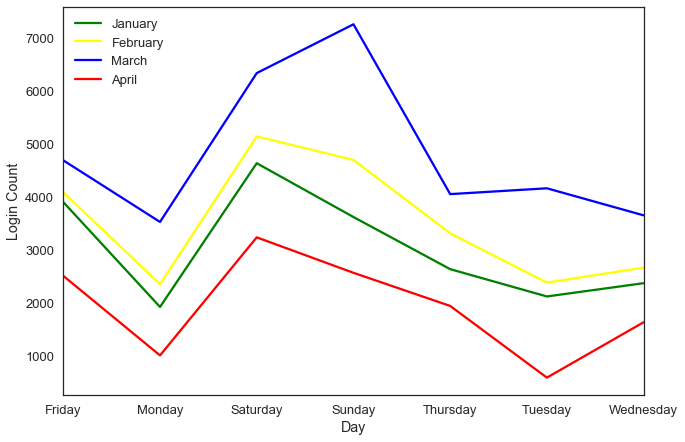

In [237]:
login15[login15.month==1].groupby('day')['login_count'].sum().plot(label='January', color='green')
login15[login15.month==2].groupby('day')['login_count'].sum().plot(label='February', color='yellow')
login15[login15.month==3].groupby('day')['login_count'].sum().plot(label='March', color='blue')
login15[login15.month==4].groupby('day')['login_count'].sum().plot(label='April', color='red')

plt.xlabel('Day')
plt.ylabel('Login Count')
plt.legend(loc='upper left')
plt.show()

- January, February, and April have similar daily trends, with Monday having lowest logins and Saturday having the highest
- March's highest login count is on a Sunday, instead of a Saturday

## Part 1C - Hourly Login Analysis

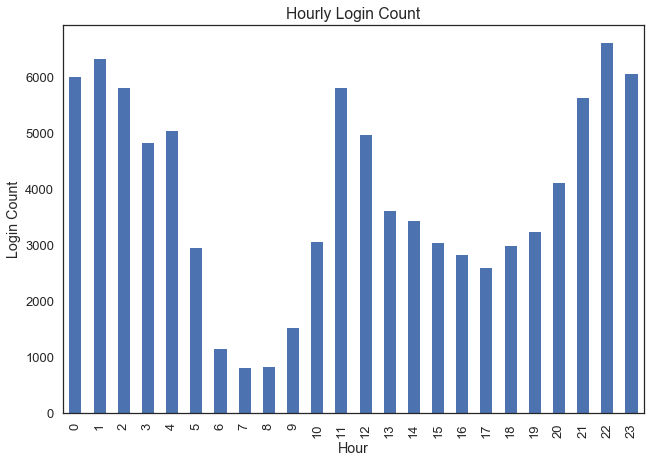

In [239]:
hourly_count = login15.groupby('hour')['login_count'].sum()
hourly_count.plot(kind='bar')

plt.xlabel('Hour')
plt.ylabel('Login Count')
plt.title('Hourly Login Count')
plt.show()

- Peak hours are lunch time (11am - 12pm) and late night (11pm - 4am)
- Slow hours are in the mornings (6am - 9am)

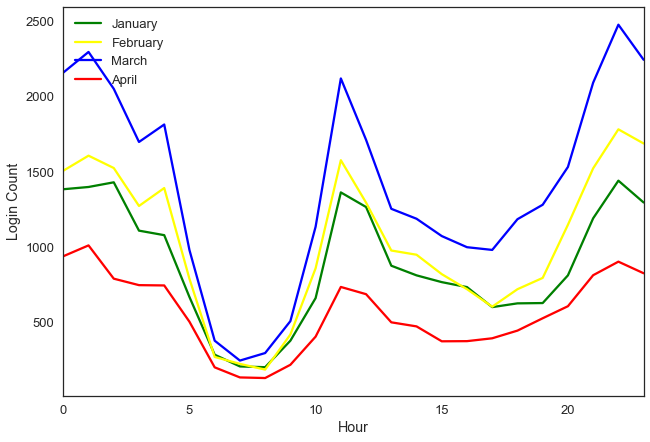

In [246]:
login15[login15.month==1].groupby('hour')['login_count'].sum().plot(label='January', color='green')
login15[login15.month==2].groupby('hour')['login_count'].sum().plot(label='February', color='yellow')
login15[login15.month==3].groupby('hour')['login_count'].sum().plot(label='March', color='blue')
login15[login15.month==4].groupby('hour')['login_count'].sum().plot(label='April', color='red')

plt.xlabel('Hour')
plt.ylabel('Login Count')
plt.legend(loc='upper left')
plt.show()

- Hourly login counts are similar for all months

<hr>

## Part 2: Experiment and Metrics Design

1. What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?


2. Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:

   a. how you will implement the experiment
   
   b. what statistical test(s) you will conduct to verify the significance of the
observation

   c. how you would interpret the results and provide

<hr>

## Part 3: Predictive Modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; **we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days**.



- **Part 3A - Data Wrangling**


- **Part 3B - Exploratory Data Analysis**
    - Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?


- **Part 3C - Predictive Modeling**
    - Build a predictive model to help Ultimate determine whether or not a user will be active
in their 6th month on the system. Discuss why you chose your approach, what
alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.


- **Part 3D - Recommendations**
    - Briefly discuss how Ultimate might leverage the insights gained from the model to improve its longterm rider retention (again, a few sentences will suffice).

### Part 3A - Data Wrangling

In [161]:
# load json data as pandas dataframe
json_text = open('ultimate_data_challenge.json')
df = pd.DataFrame(json.load(json_text))
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [162]:
# insepct dataframe
print(df.shape)
df.info()

(50000, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [163]:
# convert dates from object type to date time type
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
df['signup_date'] = pd.to_datetime(df['signup_date'])
type(df['signup_date'][0]), type(df['last_trip_date'][0])

(pandas._libs.tslib.Timestamp, pandas._libs.tslib.Timestamp)

In [164]:
# check for missing data
df.isnull().sum()

avg_dist                     0
avg_rating_by_driver       201
avg_rating_of_driver      8122
avg_surge                    0
city                         0
last_trip_date               0
phone                      396
signup_date                  0
surge_pct                    0
trips_in_first_30_days       0
ultimate_black_user          0
weekday_pct                  0
dtype: int64

- There is missing data in the following columns:
    - avg_rating_by_driver
    - avg_rating_of_driver
    - phone
- Since the missing data is a small percentage, we can fill it with the mean value of the data

In [165]:
# fill in missing data with mean
df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].mean(), inplace=True)
df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].mean(), inplace=True)

In [204]:
# inspect phone column
df['phone'].value_counts()

iPhone     34978
Android    15022
Name: phone, dtype: int64

In [167]:
# fill in missing phone data with iPhone
df['phone'].fillna('iPhone', inplace=True)
df.isnull().sum()

avg_dist                  0
avg_rating_by_driver      0
avg_rating_of_driver      0
avg_surge                 0
city                      0
last_trip_date            0
phone                     0
signup_date               0
surge_pct                 0
trips_in_first_30_days    0
ultimate_black_user       0
weekday_pct               0
dtype: int64

### Part 3B - Exploratory Data Analysis

In [168]:
# finding last trip date
df[['last_trip_date']].max()

last_trip_date   2014-07-01
dtype: datetime64[ns]

- **Last trip date**: 2014-07-01
- **Retained user**: if a user took a trip on or after 2014-06-01 (30 days preceding the last trip date of 2014-07-01)


In [169]:
# retained users
retained_users = len(df[df['last_trip_date'] >= '2014-06-01'])
retained_users

18804

In [170]:
# non-active users
unretained_users = len(df[df['last_trip_date'] < '2014-06-01'])
unretained_users

31196

In [171]:
# total users
total_users = retained_users + unretained_users
total_users

50000

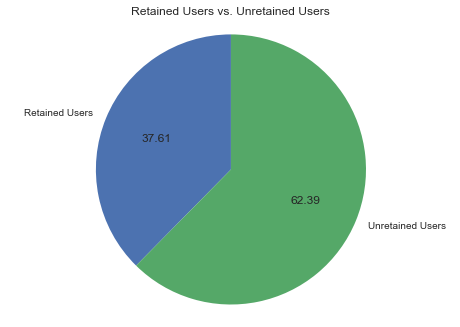

In [172]:
labels = ['Retained Users','Unretained Users']
values = [retained_users, unretained_users]
 
figureObject, axesObject = plotter.subplots()

axesObject.pie(values, labels=labels, autopct='%1.2f', startangle=90)
axesObject.axis('equal')
plt.title('Retained Users vs. Unretained Users')
plt.show()

- The percent of users retained within the 30 day window preceding 2014-07-01 is 37.61%

In [173]:
# add "Retained" column to dataframe
df['retained'] = np.nan
df.loc[df['last_trip_date'] >= '2014-06-01', 'retained'] = 1
df.loc[df['last_trip_date'] < '2014-06-01', 'retained'] = 0
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1.0
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0.0


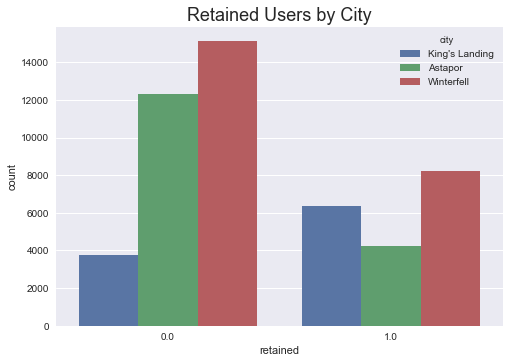

In [193]:
sns.set() 

sns.countplot(data=df, x='retained', hue='city')
plt.title('Retained Users by City', fontsize=18)
plt.show()

In [195]:
df.groupby('city')['retained'].mean().sort_values(ascending=False)

city
King's Landing    0.628134
Winterfell        0.351945
Astapor           0.255715
Name: retained, dtype: float64

- Users from King's Landing city have the highest retention rate at 62.81%

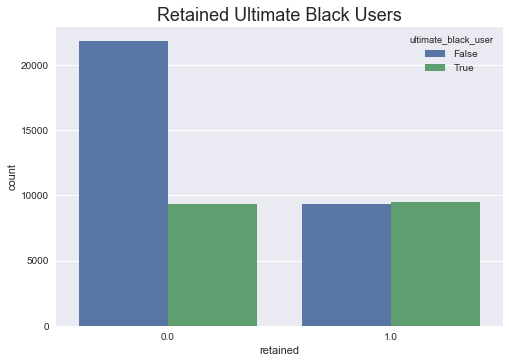

In [194]:
sns.set()

sns.countplot(data=df, x='retained', hue='ultimate_black_user')
plt.title('Retained Ultimate Black Users', fontsize=18)
plt.show()

In [197]:
df.groupby('ultimate_black_user')['retained'].mean().sort_values(ascending=False)

ultimate_black_user
True     0.503713
False    0.298818
Name: retained, dtype: float64

- **Ultimate Black Users** (users who took an Ultimate Black in their first 30 days) are potential retained users. 
- The bar graph illustrates that Ultimate Black users (in green) remained users. Whereas, more than half of the regular users (in blue) have been lost.


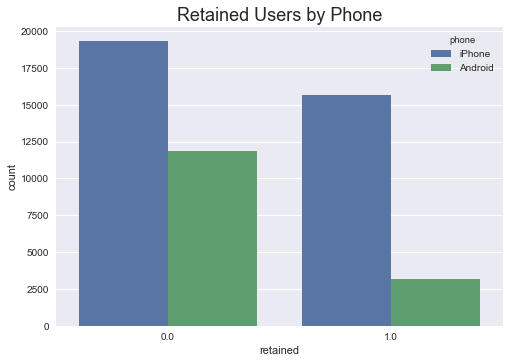

In [199]:
sns.set()

sns.countplot(data=df, x='retained', hue='phone')
plt.title('Retained Users by Phone', fontsize=18)
plt.show()

In [198]:
df.groupby('phone')['retained'].mean().sort_values(ascending=False)

phone
iPhone     0.447653
Android    0.209426
Name: retained, dtype: float64

- Retention rate for both iPhone and Android users are low. However, the retention rate for Android users is lower at 20.94%.

### Part 3C - Predictive Modeling

- Since I want to determine whether a user will be active or not, I will be running classification models.
- Classification models tested:
    - Random Forest
    - Logistic Regression
    - k-Nearest Neighbor

In [159]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, auc, roc_auc_score, roc_curve,
                            classification_report)



In [127]:
#make new df
value_columns = list(df.mean().index)
df2 = df.loc[:,value_columns]

#fix retained
df2.loc[:,'retained'] = df['retained']

#add city
city_dict = {"King's Landing":0,"Astapor":1,"Winterfell":2}
df2['city'] = df['city'].map(lambda x: city_dict[x])

#add phone
phone_dict = {None:0,'iPhone':1,'Android':2}
df2['phone'] = df['phone'].map(lambda x: phone_dict[x])

#fix ultimate black user 
df2['ultimate_black_user'] = df2['ultimate_black_user'].astype(int)

#drop nulls
df2 = df2.dropna()

In [128]:
df.shape

(50000, 13)

In [129]:
df2.shape

(50000, 11)

In [130]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1.0
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0.0


In [131]:
df2.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained,city,phone
0,3.67,5.0,4.7,1.10,15.4,4,1,46.2,1.0,0,1
1,8.26,5.0,5.0,1.00,0.0,0,0,50.0,0.0,1,2
2,0.77,5.0,4.3,1.00,0.0,3,0,100.0,0.0,1,1
3,2.36,4.9,4.6,1.14,20.0,9,1,80.0,1.0,0,1
4,3.13,4.9,4.4,1.19,11.8,14,0,82.4,0.0,2,2


In [132]:
# create values (X) and target (y) 
X = df2.drop(['retained'],axis=1)
y = df2['retained']

In [133]:
X.shape

(50000, 10)

In [134]:
y.shape

(50000,)

In [135]:
# train / test 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print('Features Training Set:', X_train.shape, 'Features Testing Set:', X_test.shape)
print('Target Training Set:', y_train.shape, 'Target Testing Set:', y_test.shape)

Features Training Set: (37500, 10) Features Testing Set: (12500, 10)
Target Training Set: (37500,) Target Testing Set: (12500,)


In [140]:
# LOGISTIC REGRESSION 
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
y_pred_prob_logreg = logreg.predict_proba(X_test)[:,1]
logreg_roc = roc_auc_score(y_test, y_pred_prob_logreg)

# RANDOM FOREST 
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_pred_prob_rf = rf.predict_proba(X_test)[:,1]
rf_roc = roc_auc_score(y_test, y_pred_prob_rf)

# KNN CLASSIFIER
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
y_pred_prob_knn = knn.predict_proba(X_test)[:,1]
knn_roc = roc_auc_score(y_test, y_pred_prob_knn)

                    ROC AUC Accuracy Precision  Recall
Classifier                                            
Logistic Regression  73.09%   68.86%    62.51%  42.96%
Random Forest        79.98%   74.37%    67.97%  60.19%
k-Nearest Neighbor   78.41%   74.10%    66.58%  62.49%


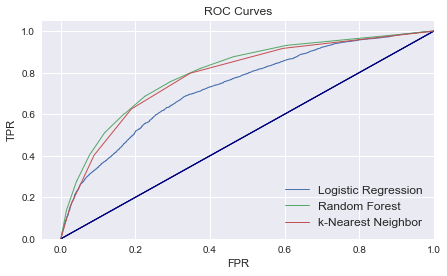

In [146]:
classifiers = [LogisticRegression(),RandomForestClassifier(), KNeighborsClassifier(),]
class_label = ['Logistic Regression','Random Forest', 'k-Nearest Neighbor',]
columns = ['Classifier','ROC AUC','Accuracy','Precision','Recall']

clf_df = pd.DataFrame(index=[0],columns=columns)
fig = plt.figure(figsize=(12,4))

for clf in classifiers:
    
    # FIT CLASSIFIER
    clf.fit(X_train,y_train)
    
    # PREDICT ON TEST SET
    y_pred = clf.predict(X_test)
    
    # ACCURACY SCORE
    acc = accuracy_score(y_test, y_pred)
    
    # PROBABILITIES
    y_pred_prob = clf.predict_proba(X_test)[:,1]
    
    # ROC SCORES 
    fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob)
    rocauc = roc_auc_score(y_test,y_pred_prob)
    
    # ROC CURVES
    ax1= plt.subplot(121)
    plt.plot([0,1], [0,1], color='navy', lw=1)
    plt.plot(fpr, tpr, lw=1, label=class_label[classifiers.index(clf)])
    plt.xlim([-.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC Curves')
    plt.legend(loc='best',fontsize=12)
    
    # PRECISION & RECALL 
    prscore = precision_score(y_test,clf.predict(X_test))
    recscore = recall_score(y_test,clf.predict(X_test))
    
    # ADD SCORES TO DF
    clf_df.loc[classifiers.index(clf)] = [class_label[classifiers.index(clf)],
                                          '{:.2%}'.format(rocauc),
                                          '{:.2%}'.format(acc),'{:.2%}'.format(prscore),
                                          '{:.2%}'.format(recscore)]

plt.tight_layout()
clf_df = clf_df.set_index('Classifier')
print(clf_df)
plt.show()

- Using the default parameters, the **Random Forest classifier** performed the best, resulting in the highest ROC AUC score and Accuracy score.
- I will be tuning the Random Forest classifier to see if the model can be improved.

In [151]:
# TUNE PAREMETERS
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': np.arange(10,50,10),
              'min_samples_leaf': np.arange(1,50,10),
              'max_features': ['auto', 'sqrt', 'log2']}

rf = RandomForestClassifier()
rf_cv = GridSearchCV(rf, param_grid, cv=5)
rf_cv.fit(X_train, y_train)

print(rf_cv.best_params_)
print(rf_cv.best_score_)

ne=rf_cv.best_params_['n_estimators']
msl=rf_cv.best_params_['min_samples_leaf']
mf=rf_cv.best_params_['max_features']

{'max_features': 'auto', 'min_samples_leaf': 21, 'n_estimators': 20}
0.7852


In [152]:
# Create the classifier
rf = RandomForestClassifier(n_estimators=ne,
                            min_samples_leaf=msl,
                            max_features=mf)

# Fit the classifier to the training data
rf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf.predict(X_test)

# PREDICTION PROBABILITIES
y_pred_prob_rf = rf.predict_proba(X_test)[:,1]

In [158]:
print('ROC AUC Score:','{:.2%}'.format(roc_auc_score(y_test, y_pred_prob_rf)))
print('Test Accuracy:', '{:.2%}'.format(accuracy_score(y_test, y_pred_rf)))
print('Precision:','{:.2%}'.format(precision_score(y_test, y_pred_rf)))
print('Recall:', '{:.2%}'.format(recall_score(y_test, y_pred_rf)))

#print('Recall:', recall_score(y_test,rf.predict(X_test))

print('\n Clasification Report:\n', classification_report(y_test, y_pred_rf))

ROC AUC Score: 85.03%
Test Accuracy: 78.43%
Precision: 74.49%
Recall: 64.85%

 Clasification Report:
              precision    recall  f1-score   support

        0.0       0.80      0.87      0.83      7800
        1.0       0.74      0.65      0.69      4700

avg / total       0.78      0.78      0.78     12500



- After tuning the parameters for the Random Forest Classifier, I get an improved ROC AUC score of 85.03% and Accuracy Score of 78.43%.

## Part 3D - Recommendations
### 1. Improve Marketing Strategies in Cities

- Users from **King's Landing** has the highest retention rate at 62.81%.
- To attract more customers in Winterfall and Astapor, Ultimate should find out what marketing strategies has been successful in King's Landing and apply those strategies to the other cities.

In [200]:
df.groupby('city')['retained'].mean().sort_values(ascending=False)

city
King's Landing    0.628134
Winterfell        0.351945
Astapor           0.255715
Name: retained, dtype: float64

### 2. Encourage New Customers to Ride

- Since we saw that **Ultimate Black Users** are potential retained users, Ultimate should encourage new customers to take a ride within 30 days of signing. This can be done by offering a rewards program or discounted first ride.


In [201]:
df.groupby('ultimate_black_user')['retained'].mean().sort_values(ascending=False)

ultimate_black_user
True     0.503713
False    0.298818
Name: retained, dtype: float64

### 3. Improve User Experience for Smartphone Users

- Since retention rate for both iPhone and Android users are low, Ultimate can look to improve user experience for these users. With special attention to Android users since the retention rate for Android users is lower at 20.94%.

In [202]:
df.groupby('phone')['retained'].mean().sort_values(ascending=False)

phone
iPhone     0.447653
Android    0.209426
Name: retained, dtype: float64